# Lognormal spot rate model

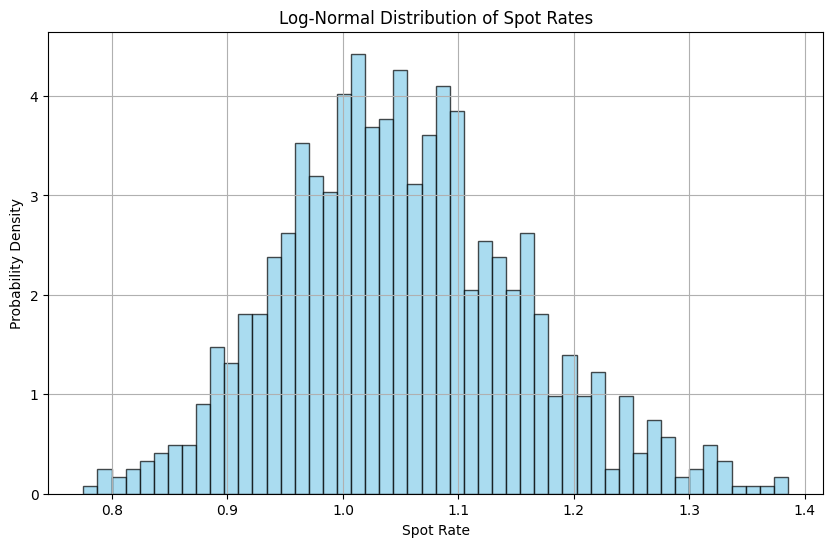

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Define parameters for log-normal distribution
mu = 0.05  # Mean of the distribution (spot rate)
sigma = 0.1  # Standard deviation of the distribution (volatility of spot rate)

# Generate random numbers from log-normal distribution
np.random.seed(0)
sample_size = 1000
lognormal_samples = np.random.lognormal(mean=mu, sigma=sigma, size=sample_size)

# Plot the histogram of log-normal samples
plt.figure(figsize=(10, 6))
plt.hist(lognormal_samples, bins=50, density=True, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Log-Normal Distribution of Spot Rates')
plt.xlabel('Spot Rate')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()